# José Luis Padilla 

# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# la unica condicion es que a debe ser menor a b
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100339.,  99577.,  99571., 100356., 100444., 100167., 100091.,
         99797., 100030.,  99628.]),
 array([ 1.00005964, 10.90002775, 20.79999587, 30.69996398, 40.59993209,
        50.4999002 , 60.39986832, 70.29983643, 80.19980454, 90.09977266,
        99.99974077]),
 <BarContainer object of 10 artists>)

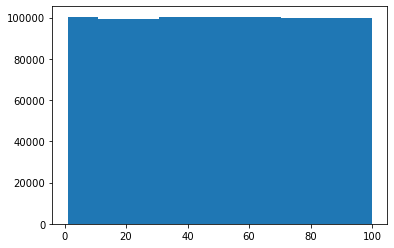

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
# funcion random en numpy

data = np.random.randn(1000000)

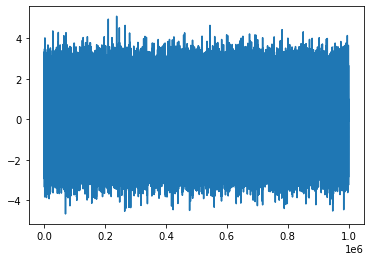

In [5]:
# plot de data
x = range(1,1000001)
plt.plot(x, data)

(array([1.11000e+02, 3.13600e+03, 3.72920e+04, 1.80608e+05, 3.61468e+05,
        2.99510e+05, 1.02780e+05, 1.42430e+04, 8.32000e+02, 2.00000e+01]),
 array([-4.67703802, -3.69993875, -2.72283947, -1.74574019, -0.76864092,
         0.20845836,  1.18555763,  2.16265691,  3.13975619,  4.11685546,
         5.09395474]),
 <BarContainer object of 10 artists>)

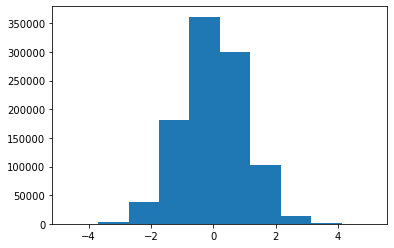

In [6]:
# histograma de data
%matplotlib inline
plt.hist(data)

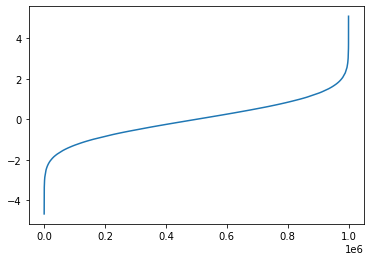

In [7]:
# funcion de distribucion acumulada de data, datos ordenados "sorted"
plt.plot(x,sorted(data))

(array([  32.,  295., 1136., 2463., 3046., 2053.,  781.,  175.,   14.,
           5.]),
 array([-2.99381126, -1.03458883,  0.92463359,  2.88385602,  4.84307845,
         6.80230087,  8.7615233 , 10.72074573, 12.67996815, 14.63919058,
        16.598413  ]),
 <BarContainer object of 10 artists>)

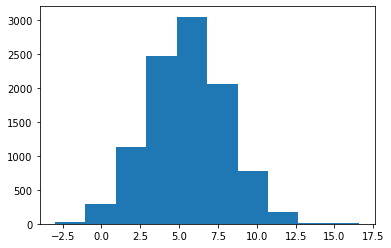

In [8]:
# nota media "mu" desviacion estandar "sd" 
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000) # la normal estandar de 10.000 valores
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z (teorema central del limite)
plt.hist(data) # histograma

In [9]:
data = np.random.randn(2,4) # 2 colecciones de 4 datos
data

array([[-0.68319419, -0.73939251,  0.93735079,  0.75549619],
       [-1.00189769,  0.02201121, -0.82582462, -0.0895177 ]])

## La simulación de Monte Carlo (estimulación de pico)

* Generamos dos números aleatorios uniforme "x" e "y" entre 0 y 1 en total 1000 veces.
* Calcularemos          $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1402079999999986


(3.1402079999999986, [<matplotlib.lines.Line2D at 0x1de19c82ca0>])

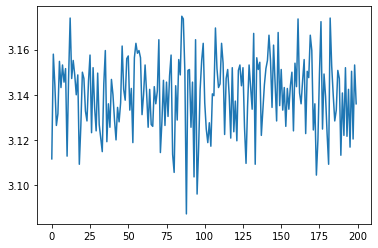

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
# pd.DataFrame nos permite transformar un diccionario a DataFrame

n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), # normal estandar
        'B' : 1.5 + 2.5 * np.random.randn(n), # normal desplazada 1.5
        'C' : np.random.uniform(5, 32, n) # uniforme entre 5 y 32
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000506,1.500013,18.497771
std,0.999770,2.497065,7.795136
min,-4.850856,-10.486385,5.000007
25%,-0.675431,-0.185215,11.745595
50%,-0.000972,1.501698,18.493599
75%,0.674420,3.185506,25.246996
max,4.839778,13.389531,31.999932


(array([5.90000e+01, 1.72700e+03, 2.43000e+04, 1.38705e+05, 3.33439e+05,
        3.34330e+05, 1.41057e+05, 2.45420e+04, 1.79500e+03, 4.60000e+01]),
 array([-4.85085627, -3.88179287, -2.91272947, -1.94366608, -0.97460268,
        -0.00553928,  0.96352412,  1.93258752,  2.90165092,  3.87071432,
         4.83977772]),
 <BarContainer object of 10 artists>)

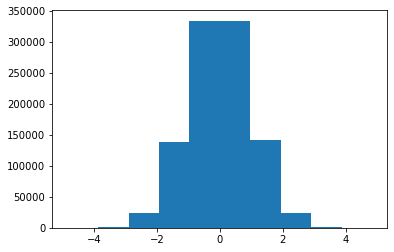

In [14]:
plt.hist(data["A"])

(array([5.90000e+01, 1.80300e+03, 2.47160e+04, 1.38597e+05, 3.26974e+05,
        3.33381e+05, 1.45418e+05, 2.68690e+04, 2.12200e+03, 6.10000e+01]),
 array([-10.48638505,  -8.09879345,  -5.71120185,  -3.32361025,
         -0.93601865,   1.45157295,   3.83916455,   6.22675615,
          8.61434775,  11.00193935,  13.38953095]),
 <BarContainer object of 10 artists>)

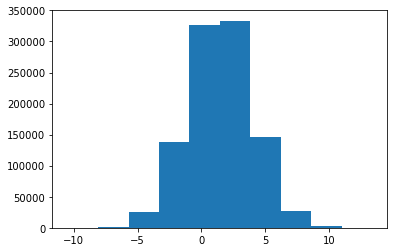

In [15]:
plt.hist(data["B"])

(array([100195., 100137.,  99724.,  99819., 100351.,  99998.,  99757.,
        100380.,  99574., 100065.]),
 array([ 5.00000726,  7.69999978, 10.39999231, 13.09998483, 15.79997735,
        18.49996988, 21.1999624 , 23.89995492, 26.59994745, 29.29993997,
        31.9999325 ]),
 <BarContainer object of 10 artists>)

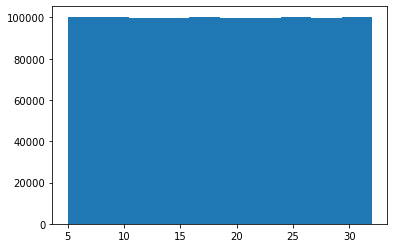

In [16]:
plt.hist(data["C"])

In [17]:
data = pd.read_csv("/Users/jlpad/Desktop/BBDD/UDE/datasets/customer-churn-model/CustomerChurnModel.txt")

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist() # extraemos la lista de columnas column names

In [20]:
a = len(colum_names) # longitud de column names
a

21

In [21]:
# 
new_data = pd.DataFrame(
    {
        'Column Name': colum_names, # normal estandar
        'A' : np.random.randn(a), # normal desplazada
        'B' : np.random.uniform(0,1,a) # uniforme entre 0 y 1
    }, index = range(42, 42 + a) # generamos los valores entre 42 hacia arriba, es muy util para pegar a otro df que ya exista
)

In [22]:
new_data

,Column Name,A,B
42,State,-1.435425,0.021686
43,Account Length,-0.698892,0.202542
44,Area Code,0.649315,0.093478
45,Phone,0.375510,0.636426
46,Int'l Plan,-0.982562,0.527955
47,VMail Plan,1.498131,0.435171
48,VMail Message,1.014725,0.321658
49,Day Mins,-1.063973,0.453914
50,Day Calls,2.016660,0.001726
51,Day Charge,-1.049929,0.615550
